<a href="https://colab.research.google.com/github/MawadaMF/MKT566/blob/main/mkt_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
import math
from sklearn import cluster
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
transcript = pd.read_csv('/content/drive/MyDrive/MKT 566 Project/transcript.csv',index_col=0)
transcript = transcript.rename(columns={'person': 'id'})
transcript.head()


,id,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


In [5]:
transcript['event'].unique()

array(['offer received', 'offer viewed', 'transaction', 'offer completed'],
      dtype=object)

In [7]:
transcript.shape

(306534, 4)

In [8]:
transcript=transcript[transcript['event']=='offer completed']

In [9]:
transcript.shape

(33579, 4)

In [10]:
profile = pd.read_csv('/content/drive/MyDrive/MKT 566 Project/profile.csv', index_col = 0)
profile.head()

,gender,age,id,became_member_on,income
0,NaN,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,NaN,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,NaN,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [11]:
profile.shape

(17000, 5)

In [13]:
df = transcript.merge(profile, on = 'id',  how='inner')
df.head()

,id,event,value,time,gender,age,became_member_on,income
0,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,offer completed,{'offer_id': '2906b810c7d4411798c6938adc9daaa5...,0,M,42,20160117,96000.0
1,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,offer completed,{'offer_id': '2298d6c36e964ae4a3e7e9706d1fb8c2...,354,M,42,20160117,96000.0
2,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,offer completed,{'offer_id': '0b1e1539f2cc45b7b9fa7c272da2e1d7...,474,M,42,20160117,96000.0
3,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,offer completed,{'offer_id': '4d5c57ea9a6940dd891ad53e9dbe8da0...,540,M,42,20160117,96000.0
4,fe97aa22dd3e48c8b143116a8403dd52,offer completed,{'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4...,0,F,39,20171217,67000.0


In [14]:
df.shape

(33579, 8)

In [16]:
df.isnull().sum()

id                     0
event                  0
value                  0
time                   0
gender              1135
age                    0
became_member_on       0
income              1135
dtype: int64

In [17]:
df.head(20)

,id,event,value,time,gender,age,became_member_on,income
0,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,offer completed,{'offer_id': '2906b810c7d4411798c6938adc9daaa5...,0,M,42,20160117,96000.0
1,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,offer completed,{'offer_id': '2298d6c36e964ae4a3e7e9706d1fb8c2...,354,M,42,20160117,96000.0
2,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,offer completed,{'offer_id': '0b1e1539f2cc45b7b9fa7c272da2e1d7...,474,M,42,20160117,96000.0
3,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,offer completed,{'offer_id': '4d5c57ea9a6940dd891ad53e9dbe8da0...,540,M,42,20160117,96000.0
4,fe97aa22dd3e48c8b143116a8403dd52,offer completed,{'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4...,0,F,39,20171217,67000.0
5,629fc02d56414d91bca360decdfa9288,offer completed,{'offer_id': '9b98b8c7a33c4b65b9aebfe6a799e6d9...,0,M,52,20180605,72000.0
6,629fc02d56414d91bca360decdfa9288,offer completed,{'offer_id': '2906b810c7d4411798c6938adc9daaa5...,432,M,52,20180605,72000.0
7,629fc02d56414d91bca360decdfa9288,offer completed,{'offer_id': '0b1e1539f2cc45b7b9fa7c272da2e1d7...,666,M,52,20180605,72000.0
8,676506bad68e4161b9bbaffeb039626b,offer completed,{'offer_id': 'ae264e3637204a6fb9bb56bc8210ddfd...,0,M,37,20170515,92000.0
9,676506bad68e4161b9bbaffeb039626b,offer completed,{'offer_id': '9b98b8c7a33c4b65b9aebfe6a799e6d9...,636,M,37,20170515,92000.0


In [18]:
len(df.id.unique())

12774

In [19]:
len(df.value.unique())

8

In [20]:
df.dropna(inplace=True)

In [21]:
df.isnull().sum()

id                  0
event               0
value               0
time                0
gender              0
age                 0
became_member_on    0
income              0
dtype: int64

In [22]:
df.shape

(32444, 8)

In [23]:
newdf=df.groupby('id')[['event','value']].count()

In [24]:
newdf=newdf.reset_index()

In [25]:
lst=df.columns[4:]

In [26]:
for col in lst:
    dic={}
    for i in newdf['id']:
        if i not in dic:
            dic[i]=df[df['id']==i][col].iloc[0]
    newdf[col]=newdf['id'].map(dic)

In [28]:
newdf['became_member_on'] = pd.to_datetime(newdf['became_member_on'], format='%Y%m%d')
newdf['member_since'] = (pd.to_datetime('2021-01-01') - newdf['became_member_on']).astype('timedelta64[D]').astype(int)

In [29]:
newdf.head(5)

,id,event,value,gender,age,became_member_on,income,member_since
0,0009655768c64bdeb2e877511632db8f,3,3,M,33,2017-04-21,72000.0,1351
1,0011e0d4e6b944f998e987f904e8c1e5,3,3,O,40,2018-01-09,57000.0,1088
2,0020c2b971eb4e9188eac86d93036a77,3,3,F,59,2016-03-04,90000.0,1764
3,0020ccbbb6d84e358d3414a3ff76cffd,3,3,F,24,2016-11-11,60000.0,1512
4,003d66b6608740288d6cc97a6903f4f0,3,3,F,26,2017-06-21,73000.0,1290


In [30]:
newdf['male'] = [1 if i == 'M' else 0 for i in newdf['gender']]
newdf['female'] = [1 if i == 'F' else 0 for i in newdf['gender']]

In [31]:
newdf.head()

,id,event,value,gender,age,became_member_on,income,member_since,male,female
0,0009655768c64bdeb2e877511632db8f,3,3,M,33,2017-04-21,72000.0,1351,1,0
1,0011e0d4e6b944f998e987f904e8c1e5,3,3,O,40,2018-01-09,57000.0,1088,0,0
2,0020c2b971eb4e9188eac86d93036a77,3,3,F,59,2016-03-04,90000.0,1764,0,1
3,0020ccbbb6d84e358d3414a3ff76cffd,3,3,F,24,2016-11-11,60000.0,1512,0,1
4,003d66b6608740288d6cc97a6903f4f0,3,3,F,26,2017-06-21,73000.0,1290,0,1


In [32]:
newdf['z_income'] = (newdf['income'] - newdf['income'].mean())/newdf['income'].std()
newdf['z_age'] = (newdf['age'] - newdf['age'].mean())/newdf['age'].std()

newdf.head()

,id,event,value,gender,age,became_member_on,income,member_since,male,female,z_income,z_age
0,0009655768c64bdeb2e877511632db8f,3,3,M,33,2017-04-21,72000.0,1351,1,0,0.191620,-1.305027
1,0011e0d4e6b944f998e987f904e8c1e5,3,3,O,40,2018-01-09,57000.0,1088,0,0,-0.498553,-0.894209
2,0020c2b971eb4e9188eac86d93036a77,3,3,F,59,2016-03-04,90000.0,1764,0,1,1.019827,0.220867
3,0020ccbbb6d84e358d3414a3ff76cffd,3,3,F,24,2016-11-11,60000.0,1512,0,1,-0.360518,-1.833221
4,003d66b6608740288d6cc97a6903f4f0,3,3,F,26,2017-06-21,73000.0,1290,0,1,0.237632,-1.715845


In [33]:
newdf.describe().round()

,event,value,age,income,member_since,male,female,z_income,z_age
count,11986.0,11986.0,11986.0,11986.0,11986.0,11986.0,11986.0,11986.0,11986.0
mean,3.0,3.0,55.0,67835.0,1462.0,1.0,0.0,0.0,-0.0
std,1.0,1.0,17.0,21734.0,417.0,0.0,0.0,1.0,1.0
min,1.0,1.0,18.0,30000.0,890.0,0.0,0.0,-2.0,-2.0
25%,2.0,2.0,44.0,52000.0,1132.0,0.0,0.0,-1.0,-1.0
50%,3.0,3.0,56.0,67000.0,1359.0,1.0,0.0,-0.0,0.0
75%,4.0,4.0,67.0,83000.0,1737.0,1.0,1.0,1.0,1.0
max,6.0,6.0,101.0,120000.0,2713.0,1.0,1.0,2.0,3.0


In [36]:
# elbow plot for k-means clustering

ss = []

for i in range(2, 11):
    
    model = cluster.KMeans(n_clusters=i, random_state=10)

    clusters = model.fit_predict(newdf[['male','female','z_income','z_age', 'member_since']])
    newdf['cluster'] = clusters
    centers = model.cluster_centers_
    ss.append(model.inertia_)

print(ss)

[617783999.8017304, 279069332.8633375, 156988363.6491475, 102993686.41671817, 71888668.51762837, 53095573.13286099, 40759683.66026513, 31762882.992545586, 26131017.073761046]


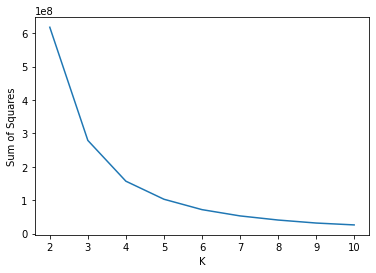

In [37]:
%matplotlib inline

# plot the elbow plot

data = pd.DataFrame({'K': range(2,11), 
                      'Sum of Squares':ss})

sns.lineplot(data = data, 
             x = 'K', 
             y = 'Sum of Squares')

Text(0.5, 1.0, 'Elbow Plot')

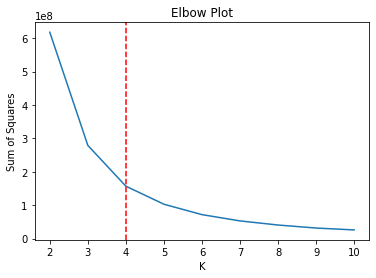

In [38]:
sns.lineplot(data = data, 
             x = 'K', 
             y = 'Sum of Squares')

plt.axvline(x = 4, color = 'red', linestyle = '--')
plt.title('Elbow Plot')